In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis, kurtosistest
import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  2020 Green Taxi Dataset (End of 2019 year to June in 2020)
<small>Note: Ở đây chúng tôi chỉ xét trong năm 2020, các năm còn lại sẽ là dữ liệu để chúng tôi thực nghiệm kiểm tra sau khi xây dựng mô hình</small>

In [3]:
def load_dataset(path,header = 'infer'):
  return pd.read_csv(path,header=header)

In [4]:
path = "/content/drive/MyDrive/DS105_Project/Dataset/Preparing/Original.csv"
taxi_2020 = load_dataset(path)
#taxi_2020.lpep_dropoff_datetime = pd.DatetimeIndex(taxi_2020.lpep_dropoff_datetime)
#taxi_2020.lpep_pickup_datetime = pd.DatetimeIndex(taxi_2020.lpep_pickup_datetime)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## 1 Show data (Original)

In [ ]:
print("5 first samples")
taxi_2020.head()

5 first samples


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


In [ ]:
print("5 last samples")
taxi_2020.tail()

5 last samples


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1225884,NaN,2020-06-30 23:03:00,2020-06-30 23:29:00,NaN,NaN,82,39,NaN,8.58,48.85,0.0,0.0,2.75,0.00,NaN,0.3,51.90,NaN,NaN,NaN
1225885,NaN,2020-06-30 23:33:00,2020-07-01 00:08:00,NaN,NaN,20,225,NaN,16.10,43.15,0.0,0.0,0.00,6.12,NaN,0.3,49.57,NaN,NaN,NaN
1225886,NaN,2020-06-30 23:32:00,2020-06-30 23:55:00,NaN,NaN,244,212,NaN,6.64,36.45,0.0,0.0,2.75,0.00,NaN,0.3,39.50,NaN,NaN,NaN
1225887,NaN,2020-06-30 23:17:00,2020-07-01 00:08:00,NaN,NaN,206,86,NaN,24.51,68.42,0.0,0.0,2.75,14.53,NaN,0.3,86.00,NaN,NaN,NaN
1225888,NaN,2020-06-30 23:25:00,2020-06-30 23:50:00,NaN,NaN,177,260,NaN,13.45,29.06,0.0,0.0,2.75,0.00,NaN,0.3,32.11,NaN,NaN,NaN


In [ ]:
print("Random 10 samples")
taxi_2020.sample(10)

Random 10 samples


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
535852,1.0,2020-02-08 21:13:36,2020-02-08 21:23:35,N,1.0,25,25,1.0,1.40,8.00,0.5,0.5,0.00,0.00,NaN,0.3,9.30,2.0,1.0,0.00
748428,2.0,2020-02-28 18:45:20,2020-02-28 19:22:49,N,1.0,247,167,1.0,7.14,28.00,1.0,0.5,0.00,0.00,NaN,0.3,29.80,2.0,1.0,0.00
1222526,NaN,2020-06-26 13:51:00,2020-06-26 14:03:00,NaN,NaN,9,82,NaN,5.44,36.28,0.0,0.0,2.75,0.00,NaN,0.3,39.33,NaN,NaN,NaN
268108,2.0,2020-01-26 09:03:45,2020-01-26 09:12:16,N,1.0,75,42,1.0,3.08,11.00,0.0,0.5,0.00,0.00,NaN,0.3,11.80,1.0,1.0,0.00
162243,2.0,2020-01-16 15:11:44,2020-01-16 15:18:33,N,1.0,7,7,5.0,1.04,6.50,0.0,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.00
491499,2.0,2020-02-05 10:00:02,2020-02-05 10:16:37,N,1.0,129,129,1.0,1.42,11.00,0.0,0.5,0.00,0.00,NaN,0.3,11.80,2.0,1.0,0.00
633405,2.0,2020-02-18 09:00:13,2020-02-18 09:24:33,N,1.0,181,125,1.0,3.38,17.50,0.0,0.5,4.21,0.00,NaN,0.3,25.26,1.0,1.0,2.75
887261,2.0,2020-03-04 23:29:42,2020-03-04 23:33:26,N,1.0,260,260,1.0,0.31,4.00,0.5,0.5,0.00,0.00,NaN,0.3,5.30,2.0,1.0,0.00
1154592,NaN,2020-05-19 05:27:00,2020-05-19 05:57:00,NaN,NaN,173,174,NaN,13.27,35.60,0.0,0.0,0.00,6.12,NaN,0.3,42.02,NaN,NaN,NaN
102573,2.0,2020-01-10 22:19:44,2020-01-10 22:20:11,N,5.0,82,82,1.0,0.18,10.00,0.0,0.0,0.10,0.00,NaN,0.3,10.40,1.0,1.0,0.00


In [ ]:
print("The number of features: ",taxi_2020.shape[1])
print("The number of sample: ",taxi_2020.shape[0])

The number of features:  20
The number of sample:  1225889


In [ ]:
print("Dataset's features")
taxi_2020.columns

Dataset's features


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [ ]:
print("Features info")
pd.read_excel("/content/drive/MyDrive/DS105_Project/Relate_info/Description.xlsx",sheet_name = 'Column Info', skiprows=1)

Features info


,Column Name,Column Description,"Term, Acronym, or Code Definitions","Additional Notes \n(where applicable, include the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and information on column source)"
0,VendorID,A code indicating the TPEP provider that provi...,"1= Creative Mobile Technologies, LLC; \n2= Cur...",NaN
1,tpep_pickup_datetime,The date and time when the meter was engaged.,NaN,NaN
2,tpep_dropoff_datetime,The date and time when the meter was disengaged.,NaN,NaN
3,Passenger_count,The number of passengers in the vehicle,NaN,"This is a driver-entered value, and might not ..."
4,Trip_distance,The elapsed trip distance in miles reported by...,NaN,NaN
5,PULocationID,TLC Taxi Zone in which the taximeter was engaged,corresponds with location_id field in NYC Taxi...,NaN
6,DOLocationID,TLC Taxi Zone in which the taximeter was disen...,corresponds with location_id field in NYC Taxi...,NaN
7,RateCodeID,The final rate code in effect at the end of th...,1= Standard rate \n2=JFK \n3=Newark \n4=Nassau...,NaN
8,Store_and_fwd_flag,This flag indicates whether the trip record wa...,Y= store and forward trip\nN= not a store and ...,NaN
9,Payment_type,A numeric code signifying how the passenger pa...,1= Credit card\n2= Cash\n3= No charge\n4= Disp...,NaN


## 2 Check data

Check duplicate

In [ ]:
def Duplicate_Sample(df):
  if len(df[df.duplicated()]) > 0:
      dup_samples = len(df[df.duplicated()])
      percent = (dup_samples / df.shape[0]) * 100
      print(f"The number of duplicated entries: {dup_samples}" )
      print(f"Percent: {percent} %")
      display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))   
  else:
      print("No duplicated entries found")
Duplicate_Sample(taxi_2020)

The number of duplicated entries: 138
Percent: 0.01125713665756035 %


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
332311,NaN,2020-01-01 00:09:00,2020-01-01 00:30:00,NaN,NaN,80,164,NaN,6.78,28.00,0.0,0.0,3.72,6.12,NaN,0.3,40.89,NaN,NaN,NaN
332312,NaN,2020-01-01 00:09:00,2020-01-01 00:30:00,NaN,NaN,80,164,NaN,6.78,28.00,0.0,0.0,3.72,6.12,NaN,0.3,40.89,NaN,NaN,NaN
332242,NaN,2020-01-01 00:36:00,2020-01-01 00:38:00,NaN,NaN,40,40,NaN,0.17,38.82,0.0,0.0,0.00,0.00,NaN,0.3,39.12,NaN,NaN,NaN
332243,NaN,2020-01-01 00:36:00,2020-01-01 00:38:00,NaN,NaN,40,40,NaN,0.17,38.82,0.0,0.0,0.00,0.00,NaN,0.3,39.12,NaN,NaN,NaN
332376,NaN,2020-01-01 01:05:00,2020-01-01 01:08:00,NaN,NaN,61,61,NaN,0.12,43.01,0.0,0.0,0.00,0.00,NaN,0.3,43.31,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351832,NaN,2020-01-05 14:40:00,2020-01-05 15:10:00,NaN,NaN,36,218,NaN,9.41,27.54,0.0,0.0,0.00,0.00,NaN,0.3,27.84,NaN,NaN,NaN
352123,NaN,2020-01-05 15:48:00,2020-01-05 15:49:00,NaN,NaN,56,56,NaN,0.10,37.72,0.0,0.0,0.00,0.00,NaN,0.3,38.02,NaN,NaN,NaN
352124,NaN,2020-01-05 15:48:00,2020-01-05 15:49:00,NaN,NaN,56,56,NaN,0.10,37.72,0.0,0.0,0.00,0.00,NaN,0.3,38.02,NaN,NaN,NaN
352578,NaN,2020-01-05 19:28:00,2020-01-05 19:29:00,NaN,NaN,17,17,NaN,0.05,8.00,0.0,0.5,0.00,0.00,NaN,0.0,8.50,NaN,NaN,NaN


Những mẫu này bị trùng lặp hoàn toàn và có liên quan đến mã định danh (ID), do đó chúng tôi quyết định loại bỏ

#### Check data types

In [ ]:
raw_types = load_dataset("/content/drive/MyDrive/DS105_Project/Relate_info/raw_types.csv",None)
raw_types.index = taxi_2020.columns
raw_types.columns = ["Orginal"]
data_types = taxi_2020.dtypes.to_frame()
data_types.columns = ["After_Load"]
DTypes = pd.concat([data_types,raw_types],axis = 1)
DTypes

,After_Load,Orginal
VendorID,float64,category
lpep_pickup_datetime,datetime64[ns],datetime64
lpep_dropoff_datetime,datetime64[ns],datetime64
store_and_fwd_flag,object,category
RatecodeID,float64,category
PULocationID,int64,category
DOLocationID,int64,category
passenger_count,float64,int64
trip_distance,float64,float64
fare_amount,float64,float64


Theo như những gì tôi tham khảo được từ <a href = 'https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page'>taxi_fare</a>, tôi có thể xem **congestion_surcharge, mta_tax, improvement_surcharge** như một biến category vì mỗi giá trị mang ý nghĩa của nó.<br>
**Passenger_count**: mỗi giá trị đại diện cho môt nhóm người

In [ ]:
DTypes.loc[['improvement_surcharge','congestion_surcharge','mta_tax','passenger_count'],'Orginal'] = 'category'
DTypes

,After_Load,Orginal
VendorID,float64,category
lpep_pickup_datetime,datetime64[ns],datetime64
lpep_dropoff_datetime,datetime64[ns],datetime64
store_and_fwd_flag,object,category
RatecodeID,float64,category
PULocationID,int64,category
DOLocationID,int64,category
passenger_count,float64,category
trip_distance,float64,float64
fare_amount,float64,float64


####Check datetime variables

Những mô ta cơ bản

In [ ]:
taxi_2020.select_dtypes(include=np.datetime64).describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,lpep_pickup_datetime,lpep_dropoff_datetime
count,1225889,1225889
unique,966382,966174
top,2020-01-09 15:25:00,2020-01-09 10:15:00
freq,27,26
first,2008-12-31 22:06:48,2008-12-31 23:12:08
last,2020-07-14 04:48:19,2020-07-14 05:05:37


Những năm mà bản ghi, ghi nhận

In [ ]:
pd.DatetimeIndex(taxi_2020.lpep_pickup_datetime).year.value_counts()

2020    1225847
2019         19
2009         18
2010          3
2008          2
Name: lpep_pickup_datetime, dtype: int64


<small>**Note:** 

*   ***improvement_surcharge : được cải tiến năm 2015***
*   ***Dữ liệu từ năm 2008 - 2020***<br>
=> Loại bỏ các dữ liệu từ năm 2015 trở về trước
</small>


Những trường hợp vô lý liên quan đến thời gian

In [ ]:
 #Thời gian trả > thời gian đón
taxi_2020[taxi_2020.lpep_dropoff_datetime < taxi_2020.lpep_pickup_datetime].shape[0] * 100 /taxi_2020.shape[0]

0.003915525793934034


<small>**Note:** 

*  **Logic**: Thời điểm đón khách < Thời điểm trả khách 
*  **Bộ dữ liệu**: Tồn tại Thời điểm đón khách > Thời điểm trả khách<br>
=> Có thể đã bị ghi nhận sai thời gian (loại bỏ)
</small>


In [ ]:
#Cùng thời điểm nhưng xe lại di chuyển
taxi_2020[(taxi_2020.lpep_dropoff_datetime == taxi_2020.lpep_pickup_datetime) & (taxi_2020.trip_distance != 0)].shape[0] *100 /taxi_2020.shape[0]

0.031242632897431986

 
<small>**Note:** 
*  **Logic**: Đón và trả cùng thời điểm, thì xe không di chuyển
* **Bộ dữ liệu**: Đón và trả cùng thời điểm, nhưng xe lại di chuyển. Đây là điều khá vô lý, thời gian không được ghi nhận nhưng khoảng cách thì có, điều này có lẽ do lỗi của đồng hồ.
=> Loại bỏ 
</small>

In [ ]:
#Khác thời điểm nhưng xe lại không di chuyển
taxi_2020[(taxi_2020.trip_distance == 0) & (taxi_2020.lpep_dropoff_datetime > taxi_2020.lpep_pickup_datetime)].shape[0] * 100/taxi_2020.shape[0]


3.4738871137598917

 
<small>**Note:** 
*  **Logic**: Khác thời điểm đón và trả,  sẽ không di chuyển (những chuyến xe đó bị hủy giữa chừng) hoặc di chuyển
* **Bộ dữ liệu**: Ở đây nằm ở trường hợp không di chuyển, có thể các chuyến này bị hủy, nhưng cũng có thể là đồng hồ xe lỗi hoặc nhập liệu sai vì thời điểm đón và trả khá xa nhau<br>
=> Sẽ quy về chung TH nhập liệu sai để thay thế (do dữ liệu khá nhiều 3.5%)
</small>

####Check other variables

Một số thông tin cơ bản

In [ ]:
print("Some basic statistical details")
taxi_2020.describe()

Some basic statistical details


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,919964.000000,919964.000000,1.225889e+06,1.225889e+06,919964.000000,1.225889e+06,1.225889e+06,1.225889e+06,1.225889e+06,1.225889e+06,1.225889e+06,0.0,1.225889e+06,1.225889e+06,919964.000000,919961.000000,919964.000000
mean,1.832470,1.108891,1.078691e+02,1.285194e+02,1.294906,8.603955e+00,1.568968e+01,6.821405e-01,3.799116e-01,9.879274e-01,3.564283e-01,NaN,2.914279e-01,1.872079e+01,1.463758,1.025030,0.464719
std,0.373449,0.681133,7.088927e+01,7.628991e+01,0.946482,7.334294e+02,1.296325e+01,1.047446e+00,2.166501e-01,2.296133e+00,1.551095e+00,NaN,5.448074e-02,1.441417e+01,0.521599,0.156218,1.030497
min,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,-3.369000e+01,-2.100000e+02,-4.500000e+00,-5.000000e-01,-1.056000e+01,-6.120000e+00,NaN,-3.000000e-01,-2.103000e+02,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,5.200000e+01,6.200000e+01,1.000000,1.080000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.800000e+00,1.000000,1.000000,0.000000
50%,2.000000,1.000000,8.200000e+01,1.290000e+02,1.000000,2.080000e+00,1.120000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.405000e+01,1.000000,1.000000,0.000000
75%,2.000000,1.000000,1.660000e+02,1.930000e+02,1.000000,4.490000e+00,2.033000e+01,1.000000e+00,5.000000e-01,1.760000e+00,0.000000e+00,NaN,3.000000e-01,2.408000e+01,2.000000,1.000000,0.000000
max,2.000000,99.000000,2.650000e+02,2.650000e+02,9.000000,1.693304e+05,7.530000e+02,1.674000e+01,3.550000e+00,6.412000e+02,9.612000e+01,NaN,3.000000e-01,7.538000e+02,5.000000,2.000000,2.750000


Thông tin về các đặc trưng có giá trị bị âm

In [ ]:
print(f'%FareNegative: {taxi_2020[taxi_2020.fare_amount < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%ExtraNegative: {taxi_2020[taxi_2020.extra < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%MTA_taxNegative: {taxi_2020[taxi_2020.mta_tax < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%trip_distanceNegative: {taxi_2020[taxi_2020.trip_distance < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%tip_amountNegative: {taxi_2020[taxi_2020.tip_amount < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%tolls_amountNegative: {taxi_2020[taxi_2020.tolls_amount < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%total_amountNegative: {taxi_2020[taxi_2020.total_amount < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%improvement_surchargeNegative: {taxi_2020[taxi_2020.improvement_surcharge < 0].shape[0]/taxi_2020.shape[0]*100}')
print(f'%congestion_surchargeNegative: {taxi_2020[taxi_2020.congestion_surcharge < 0].shape[0]/taxi_2020.shape[0]*100}')

%FareNegative: 0.2753104073859868
%ExtraNegative: 0.12276804833064005
%MTA_taxNegative: 0.24871746136885148
%trip_distanceNegative: 0.06705337922112035
%tip_amountNegative: 0.0051391276045384205
%tolls_amountNegative: 0.0003262938161611696
%total_amountNegative: 0.2752288339319465
%improvement_surchargeNegative: 0.26111662638297595
%congestion_surchargeNegative: 0.0008157345404029239


<small>**Note**
* **Logic**: Các khoản phụ phí được đề ra cũng như tiền boa thì chỉ có thêm vào hoặc không tính, chứ không thể bị trừ đi. Và khoảng cách là một biến đo lường không thể âm.
* **Bộ dữ liệu**: các thuộc tính liên quan đến các khoảng phụ phí, phí, khoảng cách có tồn tại giá trị âm <br>
=> Đây có thể do nhập dư dấu trừ, do đó ta sẽ lấy trị tuyệt đối 
</small>

Kiểm tra nhóm giá trị của các biến định tính

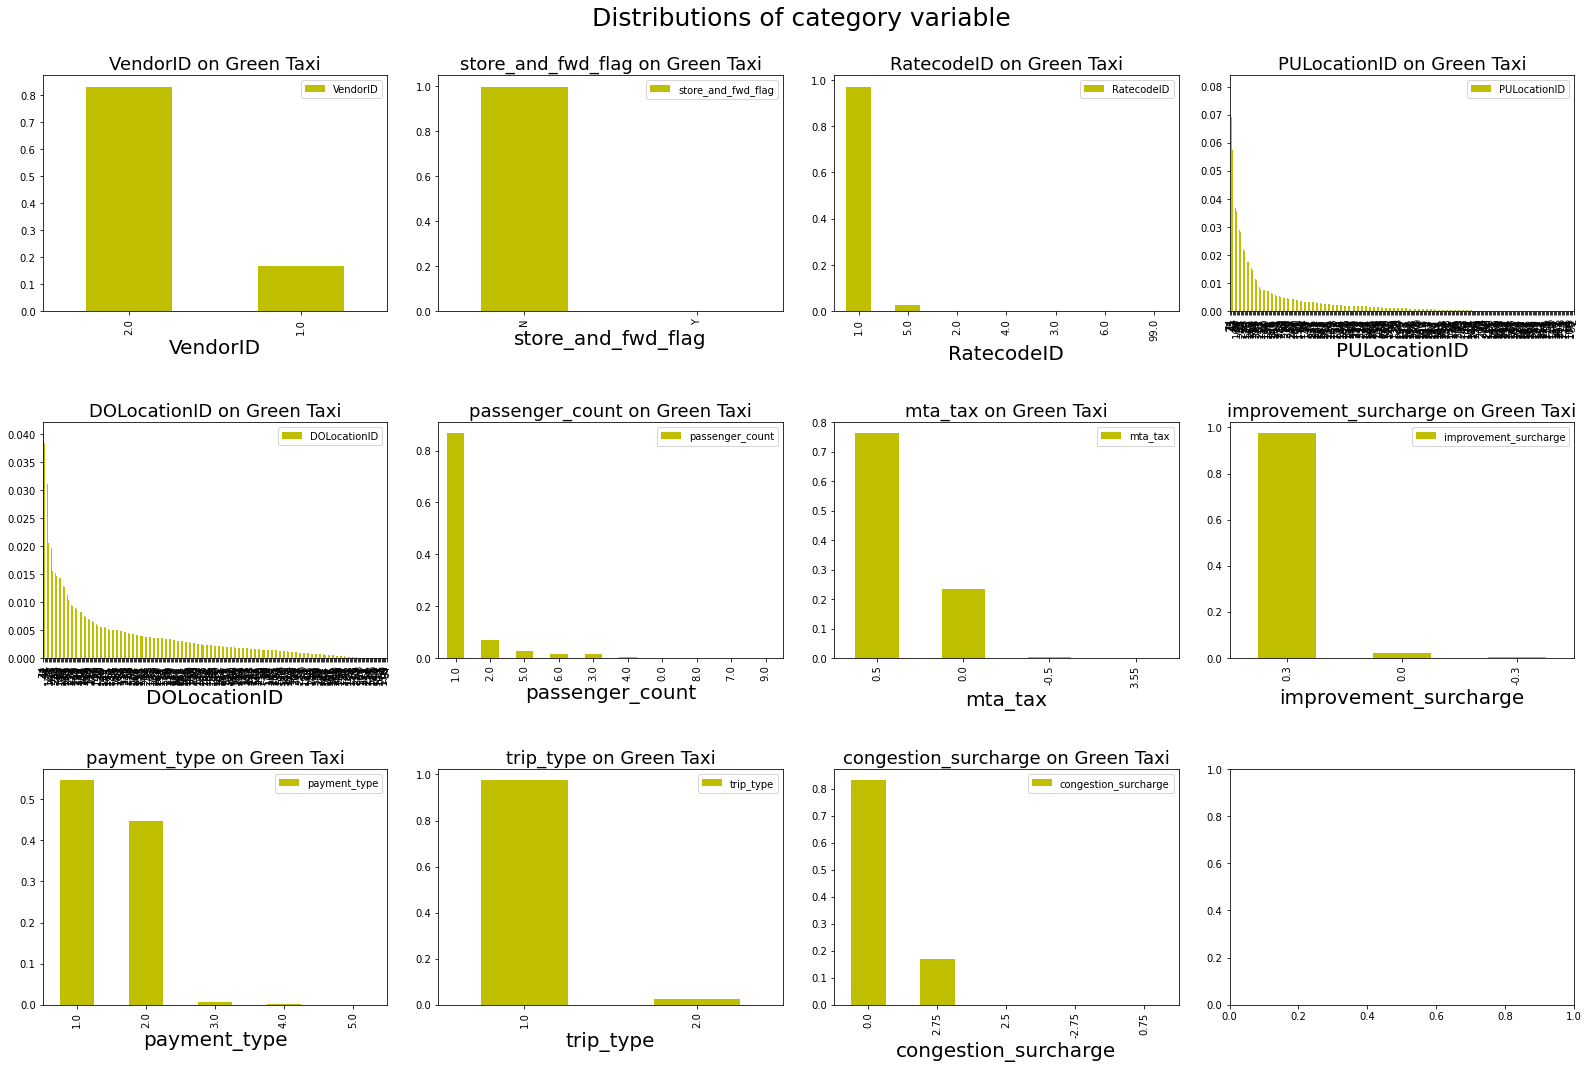

In [ ]:
def Category_Distribution(df,fe, ax):
    df[fe][df[fe].notnull()].value_counts(normalize = True).to_frame().plot(kind = 'bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(fe), fontsize=20)
    ax.set_title("{} on Green Taxi".format(fe), fontsize= 18)
category = DTypes[DTypes.Orginal == 'category'].index
Len = len(category)
column = 4
row = int (Len/4 + 1)
f, ax = plt.subplots(row,column, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
k = 0
for i in range(row):
    for j in range(column):
        Category_Distribution(taxi_2020,category[k], ax[i][j])
        if k < Len-1:
          k += 1
        else:
          break
__ = plt.suptitle("Distributions of category variable", fontsize= 25)

<small>**Note**
* **Bảng mô tả**: RatecodeID (1-6), mta_tax (0,0.5)
* <a href = 'https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%242.50%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties.'>**Taxi_fare**</a>: congestion_surcharge(0, 0.75, 2.75)
* **Bộ dữ liệu**: có những giá trị nằm ngoài như RatecodeID(99), mta_tax(3.55), congestion_surcharge(2.5 dành cho taxi vàng)<br>
=> Sẽ bỏ vì số lượng không đáng kể
</small>

Kiểm nghiệm một số thông tin từ <a href = 'https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%242.50%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties.'>Taxi_fare</a>, và bảng mô tả

In [5]:
#Tiền boa không bao gồm hình thức thanh toán tiền mặt
taxi_2020[(taxi_2020.tip_amount > 0) & (taxi_2020.payment_type == 2)].shape[0] * 100/taxi_2020.shape[0]
display(taxi_2020[(taxi_2020.tip_amount > 0) & (taxi_2020.payment_type == 2)][['payment_type','tip_amount']])

,payment_type,tip_amount
83233,2.0,0.70
262072,2.0,2.52
298813,2.0,2.86
472385,2.0,0.79
501747,2.0,3.46
953480,2.0,1.08
973297,2.0,2.06
1088137,2.0,4.00
1092933,2.0,1.20
1107193,2.0,1.50


In [ ]:
#Phí khỏi tạo cho tất cả chuyến đi là 2.5 tức tổng tiền lớn hơn bằng 2.5
taxi_2020[abs(taxi_2020.total_amount) < 2.5].shape[0] * 100/taxi_2020.shape[0]

0.2390102203380567

<small>**Note**
Như những gì quy định trong Taxi Fare và bảng mô tả thuộc tính, thì bộ dữ liệu đã vi phạm
* Đối với vi phạm về hình thức chúng tôi sẽ thay thế bằng hình thức 1 vì tất cả mã giá đều là mã chuẩn, không có mẫu nào mã đặc biệt
* Tiền boa, vì không có cơ sở để tính chuẩn tiền boa nên chúng tôi quyết định loại bỏ

Check missing_data

In [ ]:
print("Missing features statistical details")
missing_data = pd.DataFrame({'total_missing': taxi_2020.isnull().sum(), 'perc_missing': (taxi_2020.isnull().sum()/taxi_2020.shape[0])*100})
missing_data

Missing features statistical details


,total_missing,perc_missing
VendorID,305925,24.955359
lpep_pickup_datetime,0,0.000000
lpep_dropoff_datetime,0,0.000000
store_and_fwd_flag,305925,24.955359
RatecodeID,305925,24.955359
PULocationID,0,0.000000
DOLocationID,0,0.000000
passenger_count,305925,24.955359
trip_distance,0,0.000000
fare_amount,0,0.000000


In [ ]:
def Missing_Samples(df):
  miss_samples=0
  for i in range(df.shape[0]):
    sample=df.iloc[i,:]
    if np.nan in list(sample):
      miss_samples +=1
  
  if miss_samples != 0:
    percent=(miss_samples/df.shape[0])*100
    print(f"The number of missing samples: {miss_samples} samples")
    print(f"Percent : {percent} %")
  else:
    print("No missing samples")
Missing_Samples(taxi_2020)

The number of missing samples: 194148 samples
Percent : 15.837322955014688 %


Ehail_fee: 100% giá trị bị khuyết => ta sẽ loại bỏ<br>
Các mẫu khuyết không quá nhiều cũng không quá thấp => ta sẽ xử lý bằng cách điền khuyết<br>


Ngoài các xử lý trên, chúng tôi còn chuẩn bị thêm một số thuộc tính mà chúng tôi nghĩ là cần thiết cho bài toán của chúng tôi:<br>
* Biến <a href = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_(state)#:~:text=The%20first%20case%20of%20COVID,the%20same%20month%20in%202019'>Covid</a>: <small> Hiện tại, covid hoàn hành làm ảnh hưởng đến các doanh nghiệp, kinh tế đi xuống thì tiền bo cũng sẽ giảm </small>
* Biến trip_duration: <small> Khoảng thời gian nhanh chậm sẽ là yếu tố quyết định được bo hay không </small>
* Biến Speed: <small>Trong thực tế, người khách đi xe sẽ cảm thấy hài lòng với chuyến đi nhanh, tiết kiệm thời gian hơn nên tiền boa vì thế cũng cao hơn</small><br>
Bên cạnh đó, chúng tôi sẽ thay thê một số biến bằng một số biến khác mang ý nghĩa tương tự, nhưng gọn hơn, dễ quan sát hơn:
* Biến Hour: <small>Chuyến đi sẽ tập trung ở khung giờ nào</small>
* Biến Airport: <small>Đa số những chuyến đi ở khu vực sân bay thường sẽ là những người khá giả</small>
* Biến <a href= 'https://github.com/nychealth/coronavirus-data/blob/master/totals/probable-confirmed-by-bo'>PU_Borough, DO_Borough</a>: <small> Thay vì là các locationID ở từng khu vực nhỏ cụ thể, chúng tôi sẽ truy xuất từ file <a href = 'https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page?fbclid=IwAR35eLs4689UY2BgrYR8f3M4hTGUVPC82zCd5KRWkmz4iWGCkaEYGyMfmKs'>taxi+_zone_lookup.csv</a> để khoanh lại thành các quận chính ở NewYork</small>

 Các xử lý trên sẽ được xử lý ở code  <a href='https://colab.research.google.com/drive/15Z4L9f72uQ5TpdpVp1E9ezbiTO9WoJpa?usp=sharing'>**Prepare
Data**</a>